## HYD 142 HW \#1

Kenneth Larrieu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Exercise 1.6

In [6]:
discharge = [11300, 12800, 12700, 10400, 10800, 11500, 9900, 11900, 13000, 13700,
             14100, 15200, 15100, 15400, 16000, 16500, 16700]
recharge = [11400, 14600, 13600, 10100, 9900, 12200, 9700, 11800, 12700, 13600,
            14600, 14900, 14300, 14200, 17400, 16400, 14900]

n = len(discharge)

# means
d_mean = sum(discharge)*1.0/n
r_mean = sum(recharge)*1.0/n

print('means:\ndischarge: %f\nrecharge: %f\n' % (d_mean, r_mean))

# variances
d_var = sum([(d-d_mean)**2 for d in discharge])*1.0/n
r_var = sum([(r-r_mean)**2 for r in recharge])*1.0/n

print('variances:\ndischarge: %f\nrecharge: %f\n' % (d_var, r_var))

# standard deviations
d_std = np.sqrt(d_var)
r_std = np.sqrt(r_var)

print('standard deviations:\ndischarge: %f\nrecharge: %f\n' % (d_std, r_std))

# correlation
covar = sum([(d-d_mean)*(r-r_mean) for d, r in zip(discharge, recharge)])*1.0/n
corr = covar*1.0/(d_std*r_std)

print('correlation: %f' % corr)

means:
discharge: 13352.941176
recharge: 13311.764706

variances:
discharge: 4542491.349481
recharge: 4652802.768166

standard deviations:
discharge: 2131.312119
recharge: 2157.035644

correlation: 0.915616


### 2. Exercise 1.7

mean flood: 70438.620690 cfs
flood variance: 2705297887.752676


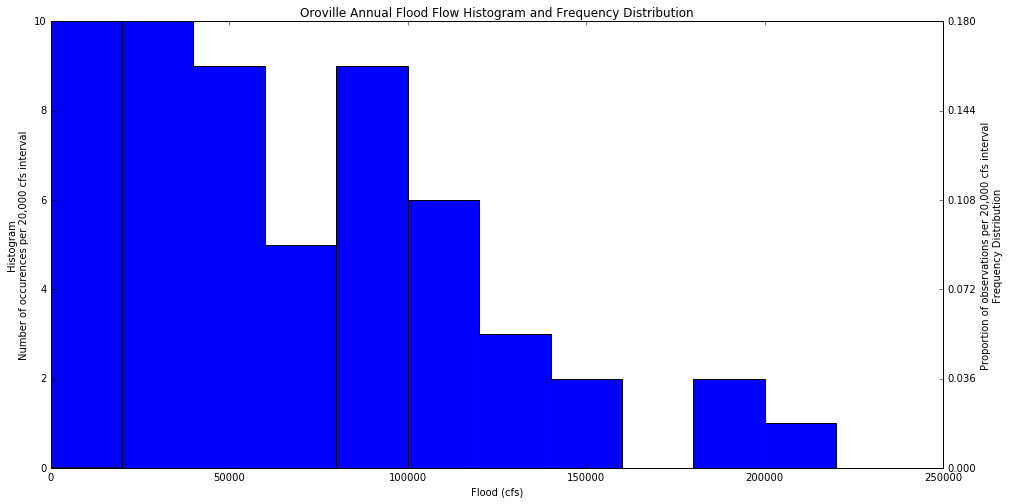

In [9]:
floods = {1907: 230000, 1956: 203000, 1928: 185000, 1938: 185000, 1940: 152000,
          1909: 140000, 1960: 135000, 1906: 128000, 1914: 122000, 1904: 118000,
          1953: 113000, 1942: 110000, 1943: 108000, 1958: 102000, 1903: 102000,
          1927: 94000, 1951: 92100, 1936: 85400, 1941: 84200, 1957: 83100,
          1915: 81400, 1905: 81000, 1917: 80400, 1930: 80100, 1911: 75400,
          1919: 65900, 1925: 64300, 1921: 62300, 1945: 60100, 1952: 59200,
          1935: 58600, 1926: 55700, 1954: 54800, 1946: 54400, 1950: 46400,
          1947: 45600, 1916: 42400, 1924: 42400, 1902: 41000, 1948: 36700,
          1922: 36400, 1959: 34500, 1910: 31000, 1918: 28200, 1944: 24900,
          1920: 23400, 1932: 22600, 1923: 22400, 1934: 20300, 1937: 19200,
          1913: 16800, 1949: 16800, 1912: 16400, 1908: 16300, 1929: 14000,
          1952: 13000, 1931: 11600, 1933: 8860, 1939: 8080}

# mean
f_mean = sum(floods.values())*1.0/len(floods.values())

print('mean flood: %f cfs' % f_mean)

# variance
f_var = sum([(f-f_mean)**2 for f in floods.values()])*1.0/len(floods.values())

print('flood variance: %f'% f_var)

# histogram and frequency distribution
bins = xrange(0, 240000, 20000)
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.set(title='Oroville Annual Flood Flow Histogram and Frequency Distribution')
ax1.hist(floods.values(), bins)
ax1.set_xlabel('Flood (cfs)')
ax1.set_ylabel('Histogram\nNumber of occurences per 20,000 cfs interval')
ax2 = ax1.twinx()
ax2.set_ylim(0, ax1.get_yticks()[-1]/len(floods.values()))
ax2.set_yticks(np.linspace(0, ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax2.set_ylabel('Proportion of observations per 20,000 cfs interval\nFrequency Distribution')
plt.show()

Reading the results from the frequency distribution, the relative frequency of a flow of 20,000 cfs or greater is $1-0.18 = \boxed{0.82}$.

### 3. Exercise 1.9

In [42]:
flows = [1340, 1380, 1450, 618, 523, 508, 1220, 1780, 1090, 944, 397, 282, 353,
         597, 995, 611, 985, 1430, 778, 1280, 1020, 1300, 1060, 412, 184, 1480,
         876, 113, 516, 1000, 1890, 611, 409, 780, 674, 969, 870, 329, 458, 1556,
         1217, 819, 576, 1324]

# mean
f_mean = sum(flows)*1.0/len(flows)

print('mean flow rate: %f' % f_mean)

# variance
f_var = sum([(f-f_mean)**2 for f in flows])*1.0/len(flows)

print('flow rate variance: %f' % f_var)

mean flow rate: 886.454545
flow rate variance: 189965.202479


A histogram would be useful for determining the likelihood of the annual maximum flow exceeding the proposed cofferdam height. The ultimate decision of which cofferdam height to build has to account for the tradeoff between the cost of building a higher cofferdam vs the chances of the cofferdam being fooded and incurring costs and project delays. I would make the choice that minimizes expected cost:

expected cost for the 3 m cofferdam: $P(\text{flow }>200 \text{ cfs}) (\$45,600) + P(\text{flow }\leq 200 \text{ cfs}) (\$15,600)$

expected cost for the 4.5 m cofferdam: $P(\text{flow }>550 \text{ cfs}) (\$38,600) + P(\text{flow }\leq 550 \text{ cfs}) (\$18,600)$

Time comes into play because that will affect the probabilities in the above expressions, e.g. higher flows are more probable during the rainy season.

### 4. 
$$p_{X,Y}(1,1) = 0.1, \, p_{X,Y}(1,2) = 0.2, \, p_{X,Y}(1,3) = 0.1, \, p_{X,Y}(2,1) = 0.2, \, p_{X,Y}(2,2) = 0.3, \, p_{X,Y}(2,3) = 0.1$$

a.
$$p_X(x) = \sum_{i} p_{X,Y}(x, y_i)$$
$$p_X(1) = p_{X,Y}(1,1)+p_{X,Y}(1,2)+p_{X,Y}(1,3) = 0.1+0.2+0.1$$
$$p_X(2) = p_{X,Y}(2,1)+p_{X,Y}(2,2)+p_{X,Y}(2,3) = 0.2+0.3+0.1$$
$$\boxed{p_X(1) = 0.4, \, p_X(2) = 0.6}$$
    
Similarly,

$$p_Y(y) = \sum_i p_{X,Y}(x_i, y)$$
$$\boxed{p_Y(1) = 0.3, \, p_Y(2) = 0.5, \, p_Y(3) = 0.2}$$

b. 
$$p_{X|Y}(x|y) = \frac{p_{X,Y}(x, y)}{p_Y(y)}$$

$$\boxed{p_{X|Y}(1|1) = \frac{1}{3}, \, p_{X|Y}(2|1) = \frac{2}{3}}$$

$$\boxed{p_{X|Y}(1|2) = \frac{2}{5},  \, p_{X|Y}(2|2) = \frac{3}{5}}$$

$$\boxed{p_{X|Y}(1|3) = \frac{1}{2}, \, \, p_{X|Y}(2|3) = \frac{1}{2}}$$

$$p_{Y|X}(y|x) = \frac{p_{X,Y}(x,y)}{p_{X}(x)}$$

$$\boxed{p_{Y|X}(1|1) = \frac{1}{4}, \, p_{Y|X}(2|1) = \frac{1}{2}, \, p_{Y|X}(3|1) = \frac{1}{4}}$$

$$\boxed{p_{Y|X}(1|2) = \frac{1}{3}, \, p_{Y|X}(2|2) = \frac{1}{2}, \, p_{Y|X}(3|2) = \frac{1}{6}}$$

### 5.

$S = 2X + Y$

$f_X(x)=f_Y(x) = \frac{1}{2}, 0 \leq x \leq 2$

Therefore, $f_{X,Y}(x,y) = f_X(x) \cdot f_Y(y) = \frac{1}{4}, \, 0 \leq x \leq 2, \, 0 \leq y \leq 2$

a. Find and sketch $f_S(s)$

$$F_S(s) = P[S \leq s] = P[2X+Y \leq s] = P[Y \leq -2X + s]$$

For $0 \leq s \leq 2$,

$$F_S(s) = \int_{0}^{\frac{s}{2}} \int_{0}^{-2x+s} \frac{1}{4} \, dy \, dx = \int_{0}^{\frac{s}{2}} (\frac{-x}{2}+\frac{s}{4})\, dx = \frac{s^2}{8} -\frac{s^2}{16} = \frac{s^2}{16}$$

For $2 \leq s \leq 4$,

$$F_S(s) = \int_{0}^{2} \int_{0}^{\frac{s-y}{2}} \frac{1}{4} \, dx \, dy = \int_{0}^{2} \frac{s-y}{8} \, dy = \frac{s-1}{4}$$

For $4 \leq s \leq 6$,

$$F_S(s) = \int_{0}^{\frac{s}{2}-1} \int_{0}^{2} \frac{1}{4} \, dy \, dx + \int_{\frac{s}{2}-1}^{2} \int_{0}^{-2x+s} \frac{1}{4} \, dy \, dx = \frac{s}{4}-\frac{1}{2} + \frac{1}{4} \int_{\frac{s}{2}-1}^{2} (-2x+s) \, dx = \frac{1}{4}(3s-5-\frac{s^2}{4})$$

Then, $f_S(s) = \frac{d F_S(s)}{ds}$:

For $0 \leq s \leq 2$, $\boxed{f_S(s) = \frac{s}{8}}$.

For $2 \leq s \leq 4$, $\boxed{f_S(s) = \frac{1}{4}}$.

For $4 \leq s \leq 6$, $\boxed{f_S(s) = \frac{3}{4}-\frac{s}{8}}$.

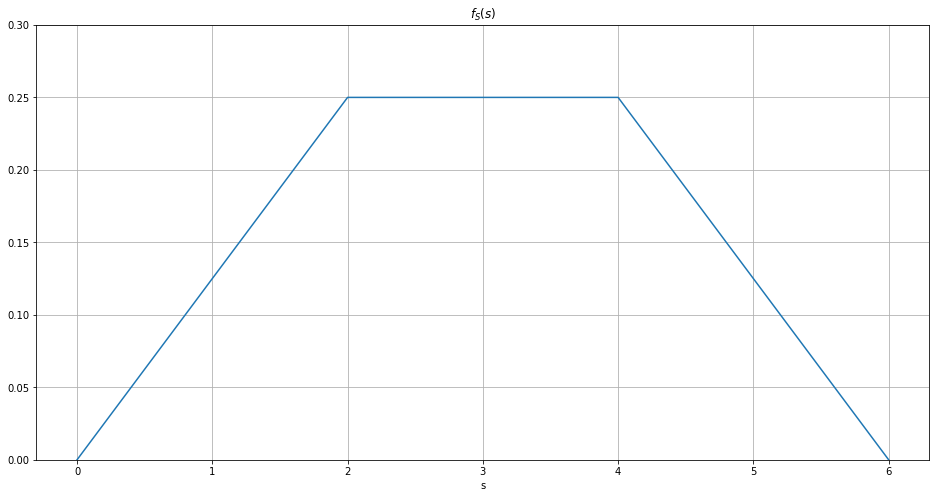

In [5]:
fig, ax = plt.subplots(figsize=(16,8))

s = np.linspace(0, 6, 100)
f = [x*1.0/8 if 0 <= x < 2 else 1.0/4 if 2 <= x < 4 else 3.0/4-x*1.0/8 for x in s]
ax.plot(s, f)
ax.set(title=r'$f_S(s)$')
ax.set_xlabel('s')
ax.set_ylim(0, 0.3)
ax.grid()
plt.show()

b. Find and sketch $f_{X|S}(x|s)$.

$$F_{S \,| \, X}(s \, | \, x) = P(S \leq s \, | \, X=x) = P(2X+Y \leq s \, | \, X=x) = P(Y \leq s-2x) = F_Y(s-2x)$$

$$F_{S \,| \, X}(s \, | \, x) = \frac{1}{2}(s-2x), \quad 2x \leq s \leq 2x+2; \quad 0, \text{ otherwise}$$

$$f_{S \,| \, X}(s \, | \, x) = \frac{\partial F_{S \,| \, X}(s \, | \, x)}{\partial s} = \frac{1}{2}, \quad 2x \leq s \leq 2x+2; \quad 0, \text{ otherwise}$$

Then using Bayes' theorem to get $f_{X \, | \, S}(x \, | \, s)$:

$$f_{X \, | \, S}(x \, | \, s) = \frac{f_{S \,| \, X}(s \, | \, x) f_X(x)}{f_S(s)}$$

which is defined for $0 \leq s \leq 6$.

For $0 < s \leq 2$:

$$\boxed{f_{X \, | \, S}(x \, | \, s) = \frac{2}{s}, \quad 0 \leq x \leq \frac{s}{2}, \quad 0, \text{ otherwise}}$$

For $2 \leq s \leq 4$:

$$\boxed{f_{X \, | \, S}(x \, | \, s) = 1, \quad \frac{s}{2}-1 \leq x \leq \frac{s}{2}, \quad 0, \text{ otherwise}}$$

For $4 \leq s < 6$:

$$\boxed{f_{X \, | \, S}(x \, | \, s) = \frac{2}{6-s}, \quad \frac{s}{2}-1 \leq x \leq 2, \quad 0, \text{ otherwise}}$$

For $s=0$:

$$\boxed{f_{X \, | \, S}(x \, | \, s) = \delta(x)}$$

For $s=6$:

$$\boxed{f_{X \, | \, S}(x \, | \, s) = \delta(x-2)}$$

where $\delta(x)$ is the Dirac delta function.

From here we see that for $0<s<6$, $f_{X \, | \, S}(x \, | \, s)$ has a uniform distribution over the interval of $x$ values that are possible for the given $s$. When $s=0$ and $s=6$, $x$ can only take one value ($0$ and $2$, correspondingly), and the density must integrate to $1$, so $f_{X \, | \, S}(x \, | \, s)$ can be thought of as a Dirac delta function.

c. Find $\mathbb{E}[X|S=1]$

In the case where $s=1$,

$$f_{X \, | \, S}(x \, | \, 1) = 2, \quad 0 \leq x \leq \frac{1}{2}, \quad 0, \text{ otherwise}$$

Then,

$$\mathbb{E}[X \, | \, S=1] = \int_{-\infty}^{\infty} x \, f_{X \, | \, S}(x \, | \, 1) \, dx = \int_0^{\frac{1}{2}} x \cdot 2 \, dx = \boxed{\frac{1}{4}}$$

d. Find $\mathbb{E}[X^2|S=1]$

Similarly,

$$\mathbb{E}[X^2 \, | \, S=1] = \int_{-\infty}^{\infty} x^2 \, f_{X \, | \, S}(x \, | \, 1) \, dx = \int_0^{\frac{1}{2}} x^2 \cdot 2 \, dx = \boxed{\frac{1}{12}}$$

### 6. Exercise 2.7

a. Since the events are independent, $P(\text{earthquake}\cap \text{wind}) = P(\text{earthquake}) \cdot P(\text{wind}) = 10^{-8} \cdot 10^{-5} = \boxed{10^{-13}}$. It is reasonable that building codes do not require both to be accounted for, there is a $99.99$% chance of then not occuring in the same minute for $1000$ years.

b. Since $P(\text{earthquake}\cap \text{wind}) \ll P(\text{earthquake})$, and $P(\text{earthquake}\cap \text{wind})\ll P(\text{wind})$, we can approximate:

$P(\text{earthquake}\cup \text{wind}) \approx P(\text{earthquake}) + P(\text{wind}) = 10^{-8} + 10^{-5} = \boxed{0.00001001 \approx 10^{-5}}$. So this is essentially the same as the probability of high wind, since that is much more likely than an earthquake.

c. Since each minute is independent, $P(\text{no earthquake in first minute} \cap \text{no earthquake in second minute} \cap \text{...})= P(\text{no earthquake in first minute}) \cdot P(\text{no earthquake in second minute})\text{...}$. This is equal to $P(\text{no earthquake in one minute})^n$, where $n$ is the total number of minutes. Then,

$$\boxed{P(\text{no earthquakes in one year}) = (1-10^{-8})^{525,600} = 0.995}$$

$$\boxed{P(\text{no earthquakes in 100 years}) = (1-10^{-8})^{52,560,000} = 0.591}$$


### 7. Exercise 2.14

a. $P(\text{first 4 days rainy}) = P(\text{rain day 1}) P(\text{rain day 2 } | \text{ rain day 1}) P(\text{rain day 3 } | \text{ rain day 1 } \cap \text{ rain day 2}) P(\text{rain day 4 } | \text{ rain day 1 } \cap \text{ rain day 2 } \cap \text{ rain day 3}) = \frac{10}{80} \cdot \frac{10}{50} \cdot \frac{10}{50} \cdot \frac{10}{50} = \boxed{0.001}$

b. $P(\text{rain day 1}) P(\text{dry day 2 } | \text{ rain day 1}) P(\text{dry day 3 } | \text{ rain day 1 } \cap \text{ dry day 2}) P(\text{dry day 4 } | \text{ rain day 1 } \cap \text{ dry day 2 } \cap \text{ dry day 3}) = \frac{10}{80} \cdot \frac{40}{50} \cdot \frac{90}{100} \cdot \frac{90}{100} = \boxed{0.081}$

### 8.

a. $P(k \text{ marked }| \, m \text{ picked}) = \frac{P(k \text{ marked } \cap \, m \text{ picked})}{P(m \text{ picked})} = \boxed{\frac{{{{n} \choose {k}}} {{{N-n} \choose {m-k}}}}{{{N} \choose {m}}}}$

b. This is just asking for $P(k \geq 1 \text{ marked } | \, m \text{ picked})$, in the case where $N=1000$, $n=100$, and $m=10$.

$$\sum_{k=1}^{10} \frac{{{{100} \choose {k}}}{{{900} \choose {10-k}}}}{{{1000} \choose {10}}} = \boxed{0.653}$$

### 9.

a. This is a geometric distribution: $p_X(x) = (1-0.0186)^{x-1} (0.0186)$. This implies: 
$$\boxed{F_X(x) = \sum_{k=1}^{x} (1-0.0186)^{k-1} (0.0186)}$$

b.

$$P(X < 10) = F_X(9) = \sum_{k=1}^{9} (1-0.0186)^{k-1} (0.0186)=\boxed{0.156}$$

c.

$$P(X < 20) = F_X(19) = \sum_{k=1}^{19} (1-0.0186)^{k-1} (0.0186)=\boxed{0.300}$$

d.

$$P(X \leq 52) = F_X(52) = \sum_{k=1}^{52} (1-0.0186)^{k-1} (0.0186)=\boxed{0.623}$$

e.

$$P(X \leq 104) = F_X(104) = \sum_{k=1}^{104} (1-0.0186)^{k-1} (0.0186)=\boxed{0.858}$$

### 10.

$$Z = X + Y$$

$$Var(X+Y) = Var(Z) = \mathbb{E}[(Z-\mu_Z)^2] = \mathbb{E}[Z^2-2Z\mu_Z+\mu_Z^2] = \mathbb{E}[Z^2]-2\mu_Z\mathbb{E}[Z]+\mu_Z^2$$

Since the expectation value operator is linear. Substituting $\mu_Z=\mu_X+\mu_Y$ and $Z = X + Y$ yields

$$\mathbb{E}[X^2+2XY+Y^2] - 2(\mu_X+\mu_Y)\mathbb{E}[X+Y]+(\mu_X+\mu_Y)^2 = \mathbb{E}[X^2]+2\mathbb{E}[XY]+\mathbb{E}[Y^2]-2\mu_X^2-2\mu_Y^2-4\mu_X\mu_Y + \mu_X^2+\mu_Y^2+2\mu_X\mu_Y$$

$$=\mathbb{E}[X^2] + 2\mathbb{E}[XY] + \mathbb{E}[Y^2] - (\mu_X^2+\mu_Y^2+2\mu_X\mu_Y)$$

$$=(\mathbb{E}[X^2]-\mu_X^2) + (\mathbb{E}[Y^2] - \mu_Y^2) + 2(\mathbb{E}[XY] - \mu_X\mu_Y) = Var(X) + Var(Y) + 2Cov(X, Y)$$

Since $X$ and $Y$ are independent, $Cov(X, Y) = 0$, therefore $\boxed{Var(X+Y) = Var(X) + Var(Y)}$.

### 11.

a. Take $R = $ it rains, $F = $ rain forecasted, $U = $ takes umbrella. We are given that:

$$P(R) = P(R^c) = \frac{1}{2}$$

$$P(R | F) = P(R^c | F^c) = \frac{2}{3}, \quad\text{ thus }P(R^c| F) = P(R| F^c) = \frac{1}{3}$$

$$P(U | F) = 1, \quad P(U | F^c) = \frac{1}{3}; \quad\text{ thus }P(U^c| F) = 0, \quad P(U^c | F^c) = \frac{2}{3}$$

Find $P(U^c | R)$.

$$P(R) = P(R|F)P(F) + P(R|F^c)(1-P(F)) = \frac{2}{3}P(F) + \frac{1}{3}(1-P(F)) = \frac{1}{2}$$

$$\frac{1}{3}P(F) = \frac{1}{6} \quad \rightarrow \quad P(F) = \frac{1}{2}, \quad P(F^c) = \frac{1}{2}$$

$$P(U^c|R)P(R) = P(U^c \cap R) = P(U^c \cap R \cap F) + P(U^c \cap R \cap F^c)$$

$$P(U^c|R)P(R) = P(U^c | R \cap F)P(R|F)P(F) + P(U^c | R \cap F^c)P(R|F^c)P(F^c)$$

Since $P(R) = P(F) = P(F^c) = \frac{1}{2}$, we can divide by $\frac{1}{2}$ on both sides, yielding:

$$P(U^c|R) = P(U^c | R \cap F)P(R|F) + P(U^c | R \cap F^c)P(R | F^c)$$

$$P(U^c|R) = 0 \cdot \frac{2}{3} + \frac{2}{3} \cdot \frac{1}{3} = \boxed{\frac{2}{9}}$$


b. Find $P(U | R^c)$.

Similarly,

$$P(U|R^c)P(R^c) = P(U | R^c \cap F)P(R^c|F)P(F) + P(U | R^c \cap F^c)P(R^c|F^c)P(F^c)$$

Dividing both sides by $P(R^c) = P(F) = P(F^c) = \frac{1}{2}$:

$$P(U|R^c) = P(U | R^c \cap F)P(R^c|F) + P(U | R^c \cap F^c)P(R^c|F^c)$$

$$P(U|R^c) = 1 \cdot \frac{1}{3} + \frac{1}{3} \cdot \frac{2}{3} = \boxed{\frac{5}{9}}$$

### 12. Exercise 2.10 parts (a) - (d)

a. Take $I = $ insufficient water supply, $D_i = $ water demand level. Then:

$$P(I) = \sum_{i=1}^3 P(I | D_i) P(D_i) = 0 \cdot 0.6 + 0.1 \cdot 0.3 + 0.5 \cdot 0.1 = \boxed{0.21}$$

b. For $D_2 = 150,000$ gd, we want $P(D_2 | I)$, the probability that $D_2$ "caused" insufficient water supply.

$$P(D_2 | I) = \frac{P(I | D_2) P(D_2)}{P(I)} = \frac{0.1 \cdot 0.3}{0.21} = \boxed{0.143}$$

c. $P(I) = P(I|F)P(F) + P(I|F^c)P(F^c) = P(I)P(F) + P(I)P(F^c) = $???? What is this question asking? Total probability of what??

d.

$$P(M_i | )$$

### 13.

a. 

$$\boxed{P(X \leq 1) = F_X(1) = 1 - e^{-4} = 0.98168}$$

$$\boxed{P(X \geq 2) = 1 - F_X(2) = e^{-8} = 0.000335}$$

$$\boxed{P(X = 2) = 0} $$ since the distribution is continuous.

b.

$$\boxed{f_X(x) = \frac{\partial F_X(x)}{\partial x} = 4 e^{-4x}, \quad x \geq 0}$$

c.

$$\boxed{p_Y(0) = F_X(2) = 1 - e^{-8} = 0.999665}$$

$$\boxed{p_Y(1) = 1 - F_X(2) = e^{-8} = 0.000335}$$

d.

$$Z = X_1 + X_2$$

$$\boxed{f_Z(z) = \int_0^{z} f_X(x) f_X(z-x) dx = 16 \int_0^{z} e^{-4x} e^{-4(z-x)} dx = 16 \int_0^{z} e^{-4z} dx = 16 \, z \, e^{-4z}, \quad z \geq 0}$$

$$\boxed{F_Z(z) = \int_0^z 16 \, z \, e^{-4z} dz = -4 z e^{-4z} + \int_0^z 4 e^{-4z} dz = 1 - e^{-4z}(4z + 1), \quad z \geq 0}$$

$$\varphi_Z(u) = \int_{-\infty}^\infty e^{iuz} f_Z(z) dz = 16 \int_0^\infty z e^{(iu - 4)z} dz = \frac{16}{iu-4}z e^{(iu - 4)z} \Big|_0^{\infty} - \frac{16}{iu - 4} \int_0^\infty e^{(iu - 4)z} dz$$

$$\varphi_Z(u) = \frac{16}{(iu-4)^2}$$

$$\mu = \mathbb{E}[Z] = \frac{1}{i} \frac{\partial \varphi_Z(u)}{\partial u} \Big|_{u=0} = \frac{-32}{(iu-4)^3} \Big|_{u=0} = \frac{1}{2} $$

We see the derivatives of $\varphi_Z(u)$ follow a pattern:

$$\frac{\partial^n \varphi_Z(u)}{\partial u^n} \Big|_{u=0} = \frac{(-1)^n i^n (n+1)! 16}{(iu-4)^{n+2}} \Big|_{u=0} = \frac{i^n (n+1)!}{4^n}$$

Thus the moments become:

$$\mathbb{E}[Z^n] = \frac{1}{i^n} \frac{\partial^n \varphi_Z(u)}{\partial u^n} \Big|_{u=0} = \frac{(n+1)!}{4^n} $$

The first central moment is always zero:

$$\mathbb{E}[(Z-\mu)^1] = \mathbb{E}[Z] - \mathbb{E}[\mu] = \mu - \mu = \boxed{0}$$

Second central moment:

$$\mathbb{E}[(Z-\mu)^2] = \mathbb{E}[Z^2] - 2\mu \mathbb{E}[Z] + \mu^2\mathbb{E}[1] = \mathbb{E}[Z^2] - \mu^2 $$

$$\mathbb{E}[(Z-\mu)^2] = \frac{(2+1)!}{4^2} - \frac{1}{4} = \boxed{\frac{1}{8}}$$

Third central moment:

$$\mathbb{E}[(Z-\mu)^3] = \sum_{n=0}^3 {{3} \choose {n}} (-\mu)^{3-n} \mathbb{E}[Z^n] = \sum_{n=0}^3 \frac{3!}{n!(3-n)!} \left(\frac{-1}{2}\right)^{3-n} \frac{(n+1)!}{4^n} = \sum_{n=0}^3 \frac{3!}{(3-n)!} \left(\frac{-1}{2}\right)^{3-n} \frac{(n+1)}{4^n} = \sum_{n=0}^3 (-1)^{n+1} \frac{3!}{(3-n)!} \frac{n+1}{2^{n+3}}$$

$$\mathbb{E}[(Z-\mu)^3] = -1 \cdot \frac{1}{8} + 3 \cdot \frac{2}{16} - 3 \cdot \frac{3}{32} + 1 \cdot \frac{4}{64} = \boxed{\frac{1}{16}}$$

Fourth central moment, similarly:

$$\mathbb{E}[(Z-\mu)^4] = \sum_{n=0}^4 {{4} \choose {n}} (-\mu)^{4-n} \mathbb{E}[Z^n] = \sum_{n=0}^4 (-1)^n \frac{4!}{(4-n)!} \frac{n+1}{2^{n+4}} = \boxed{\frac{3}{32}}$$

e. 

Let $Z_N = X_1 + X_2 + ... + X_N$, where the $X_i$'s are i.i.d. with pdf $f_X(x)$.

We already know $f_{Z_1}(x) = 4 e^{-4x}$ and $f_{Z_2}(x) = 16 x e^{-4x}$.

Then when $n = 3$:

$$f_{Z_3}(z) = \int_{-\infty}^{\infty} f_X(x) f_{Z_2}(z - x) dx = \int_{0}^{z} 4 e^{-4x} 16 (z-x) e^{-4(z-x)} dx = \frac{4^3}{2!} z^2 e^{-4z}, \quad z \geq 0$$

This pattern continues, such that:

$$\boxed{f_{Z_N}(x) = \frac{4^N}{(N-1)!} x^{N-1} e^{-4x} = \frac{4^N}{\Gamma(N)} x^{N-1} e^{-4x}, \quad x \geq 0}$$

This is a Gamma distribution: $\boxed{Z_N \sim \text{Gamma}(N, 4)}$

CDF and moments?

### 15. (in class)

$$h_0 = a - bi = \text{ retention capacity}, \quad 0 \leq i \leq \frac{a}{b}; \quad h_0 = 0, \quad \text{o.w.}$$

$$h_A = \text{ actual retention}$$

Assume $i \sim Exp$, $h \sim Gamma$.

When $h < h_0(i)$, $h_A = h$ and when $h \geq h_0(i)$, $h_A = h_0(i)$.

$$\mathbb{E}[h_A] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} h_A \, f_H(h) f_I(i) \, di \, dh = \int_0^{\frac{a}{b}} \int_0^{a-bi} h \, f_H(h) f_I(i) \, dh \, di + \int_0^{\frac{a}{b}} \int_{a-bi}^{\infty} (a - bi) \, f_H(h) f_I(i) \, di \, dh$$

*(Compute integrals numerically)*

### 16.

a.

$$\varphi_X(u) = \frac{\sin(u)}{u} = \mathbb{E}[e^{iux}] = \int_{-\infty}^{\infty} e^{iux} f_X(x) dx$$

Then $f_X(x)$ is the inverse Fourier transform of $\varphi_X(u)$:

$$f_X(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-iux} \frac{\sin(u)}{u} du = \frac{1}{2\pi} \int_{-\infty}^{\infty} (\cos(-ux) + i \sin(-ux)) \frac{\sin(u)}{u} du $$

b. Find $\varphi_X(u)$ for exponential, uniform, and Gaussian r.v.'s.

expoential: $f_X(x) =\lambda e^{-\lambda x}$, $x \geq 0$

$$\varphi_X(u) = \int_0^{\infty} e^{iux} \lambda e^{-\lambda x} dx = \frac{\lambda}{iu-\lambda} e^{(iu-\lambda) x} \Big|_{x=0}^{\infty} = \boxed{\frac{\lambda}{\lambda-iu}}$$

uniform: $f_X(x) = \frac{1}{b-a}$, $a \leq x \leq b$

$$\varphi_X(u) = \int_a^b e^{iux} \frac{1}{b-a} dx = \boxed{\frac{1}{iu(b-a)} e^{iu(b-a)}}$$

Gaussian: $f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$, $x \in \mathbb{R}$

$$\varphi_X(u) = \int_{-\infty}^{\infty} e^{iux} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} dx$$

c.

$$\varphi_X(u) = \frac{\lambda^2}{\lambda^2 + u^2}$$

$$\mu = \mathbb{E}[X] = \frac{1}{i} \frac{\partial \varphi_X(u)}{\partial u} \Big|_{u=0} = \frac{-2\lambda^2 u}{i(\lambda^2 + u^2)^2} \Big|_{u=0} = 0$$

First central moment is always zero: $\mathbb{E}[(X-\mu)^1] = \boxed{0}$

Second central moment:

$$\mathbb{E}[(X-\mu)^2] = \mathbb{E}[X^2] - \mu^2 = $$

Third central moment:

$$\mathbb{E}[(X-\mu)^3] = \mathbb{E}[X^3] = \boxed{0}$$

Fourth central moment:

$$\mathbb{E}[(X-\mu)^4] = \mathbb{E}[X^4] = \frac{\partial^4 \varphi_X(u)}{\partial u^4} \Big|_{u=0} $$

### 17.

a.

$$\int_{-\infty}^{\infty} f_X(x) dx = \frac{1}{2}k + k = \frac{3}{2}k = 1 \quad \rightarrow \quad \boxed{k = \frac{2}{3}}$$

b.

$$F_X(x) = \int_{-\infty}^x f_X(x) dx$$

$$\boxed{F_X(x) = \frac{x^2}{3}, \quad 0 \leq x \leq 1; \quad F_X(x) = \frac{1}{3}(2x-1), \quad 1 \leq x \leq 2; \quad F_X(x) = 0, \quad \text{o.w.}}$$

c. The median $m$ satisfies the following:

$$\int_{-\infty}^{m} f_X(x) dx = F_X(m) = \frac{1}{2} \quad \rightarrow \quad \boxed{m = \frac{5}{4}}$$

Similarly, the lower quartile $q_l$ satisfies:

$$F_X(q_l) = \frac{1}{4} \quad \rightarrow \quad \boxed{q_l = \frac{\sqrt{3}}{2}}$$

And for the upper quartile $q_u$:

$$F_X(q_u) = \frac{3}{4} \quad \rightarrow \quad \boxed{q_u = \frac{13}{8}}$$

### 18. Exercise 2.32

a. We are given the pdf of $Z$:

$$f_Z(z) = \frac{2 \lambda}{d(\lambda d + 2)} z, \quad 0 < z < d; \quad \frac{2 \lambda}{\lambda d + 2} e^{-\lambda (z-d)}, \quad z \geq d$$

We are also given that $Y$ is a function of $Z$, namely:

$$Y = Z, \quad 0 < Z < d$$

$$Y = d, \quad d \leq Z < c + d$$

$$Y = Z - c, \quad Z \geq c + d$$



To show that $f_Z(z)$ is properly defined, the following statements must be true:

$$f_Z(z) \geq 0 \quad \forall \, z \in \mathbb{R}$$

$$\int_{-\infty}^{\infty} f_Z(z) dz = 1$$

Let's check:

$$\int_{-\infty}^{\infty} f_Z(z) dz = \int_0^d \frac{2 \lambda}{d(\lambda d + 2)} z dz + \int_d^{\infty} \frac{2 \lambda}{\lambda d + 2} e^{-\lambda (z-d)} dz$$

$$= \frac{\lambda d}{\lambda d + 2} + \left[ \frac{-2}{\lambda d + 2} e^{-\lambda (z-d)} \right] \Big|_{z=d}^{\infty} = \frac{\lambda d}{\lambda d + 2} + \frac{2}{\lambda d + 2} = 1$$

So it checks out.

A plot of the distribution for $\lambda = d =1$:

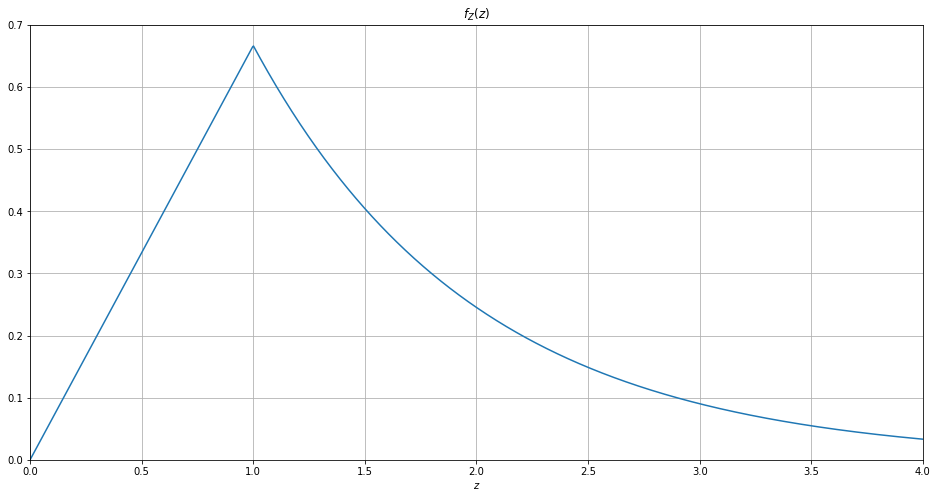

In [13]:
fig, ax = plt.subplots(figsize=(16,8))

x = np.linspace(0,4, 1000)
y = np.piecewise(x, [x<1, x >= 1], [lambda x: 2.0/3*x, lambda x: 2.0/3*np.e**(1-x)])

ax.plot(x, y)
ax.grid()
ax.set_title(r'$f_Z(z)$')
ax.set_xlabel(r'$z$')
ax.set_xlim(0, 4)
ax.set_ylim(0, 0.7)
plt.show()

b. Find $F_Y(y)$.

For $0 < y < d$:

$$F_Y(y) = \int_{0}^{y} \frac{2 \lambda}{d(\lambda d + 2)} z dz = \boxed{\frac{\lambda y^2}{d(\lambda d + 2)}}$$

For $y = d$:

$$F_Y(y) = \frac{\lambda d}{\lambda d + 2} + \int_d^{c+d} \frac{2 \lambda}{\lambda d + 2} e^{-\lambda (z-d)} dz = \boxed{1 - \frac{2}{\lambda d + 2} e^{-\lambda c}} $$

For $d < y < \infty$:

$$F_Y(y) =  \frac{\lambda d}{\lambda d + 2} + \int_d^{y+c} \frac{2 \lambda}{\lambda d + 2} e^{-\lambda (z-d)} dz = \frac{\lambda d}{\lambda d + 2} + \left[ \frac{-2}{\lambda d + 2} e^{-\lambda (z-d)} \right] \Big|_{z=d}^{y+c} = \boxed{1 - \frac{2}{\lambda d +2} e^{-\lambda (y+c-d)}}$$